In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.15,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
train_data = datagen.flow_from_directory(
    'dataset/train',
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

Found 6286 images belonging to 29 classes.


In [13]:
val_data = datagen.flow_from_directory(
    'dataset/train',
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

Found 1100 images belonging to 29 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dropout, \
    Dense

model = Sequential([
    Input((300, 300, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    GlobalAveragePooling2D(),

    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(29, activation='softmax')
])


In [44]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 35, 35, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,397 (446.86 KB)

 Trainable params: 113,949 (445.11 KB)

 Non-trainable params: 448 (1.75 KB)

In [45]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [47]:
model.fit(train_data, validation_data=val_data, epochs=20, batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.3143 - loss: 2.3985 - val_accuracy: 0.0345 - val_loss: 11.6212
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 785s 4s/step - accuracy: 0.7856 - loss: 0.7249 - val_accuracy: 0.0464 - val_loss: 11.5330
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 796s 4s/step - accuracy: 0.9003 - loss: 0.3464 - val_accuracy: 0.1091 - val_loss: 6.3220
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.9320 - loss: 0.2326 - val_accuracy: 0.6018 - val_loss: 1.1176
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 787s 4s/step - accuracy: 0.9576 - loss: 0.1484 - val_accuracy: 0.3636 - val_loss: 3.2133
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 786s 4s/step - accuracy: 0.9633 - loss: 0.1264 - val_accuracy: 0.8100 - val_loss: 0.6911
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 786s 4s/step - accuracy: 0.9690 - loss: 0.1059 - val_accuracy: 0.7745 - val_loss: 0.5466
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 782s 4s/step - accuracy: 0.9767 - loss: 0.0846 - val_ac

In [8]:
test_data = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    'dataset/test',
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 1303 images belonging to 29 classes.


In [49]:
val_loss, val_acc = model.evaluate(test_data)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 30s 728ms/step - accuracy: 0.9793 - loss: 0.0537
Validation Accuracy: 0.9823
Validation Loss: 0.0495


In [ ]:
model.save("tsl_model.keras")

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model("tsl_model.keras")

In [13]:
import numpy as np

predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

class_labels = list(test_data.class_indices.keys())

41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 854ms/step


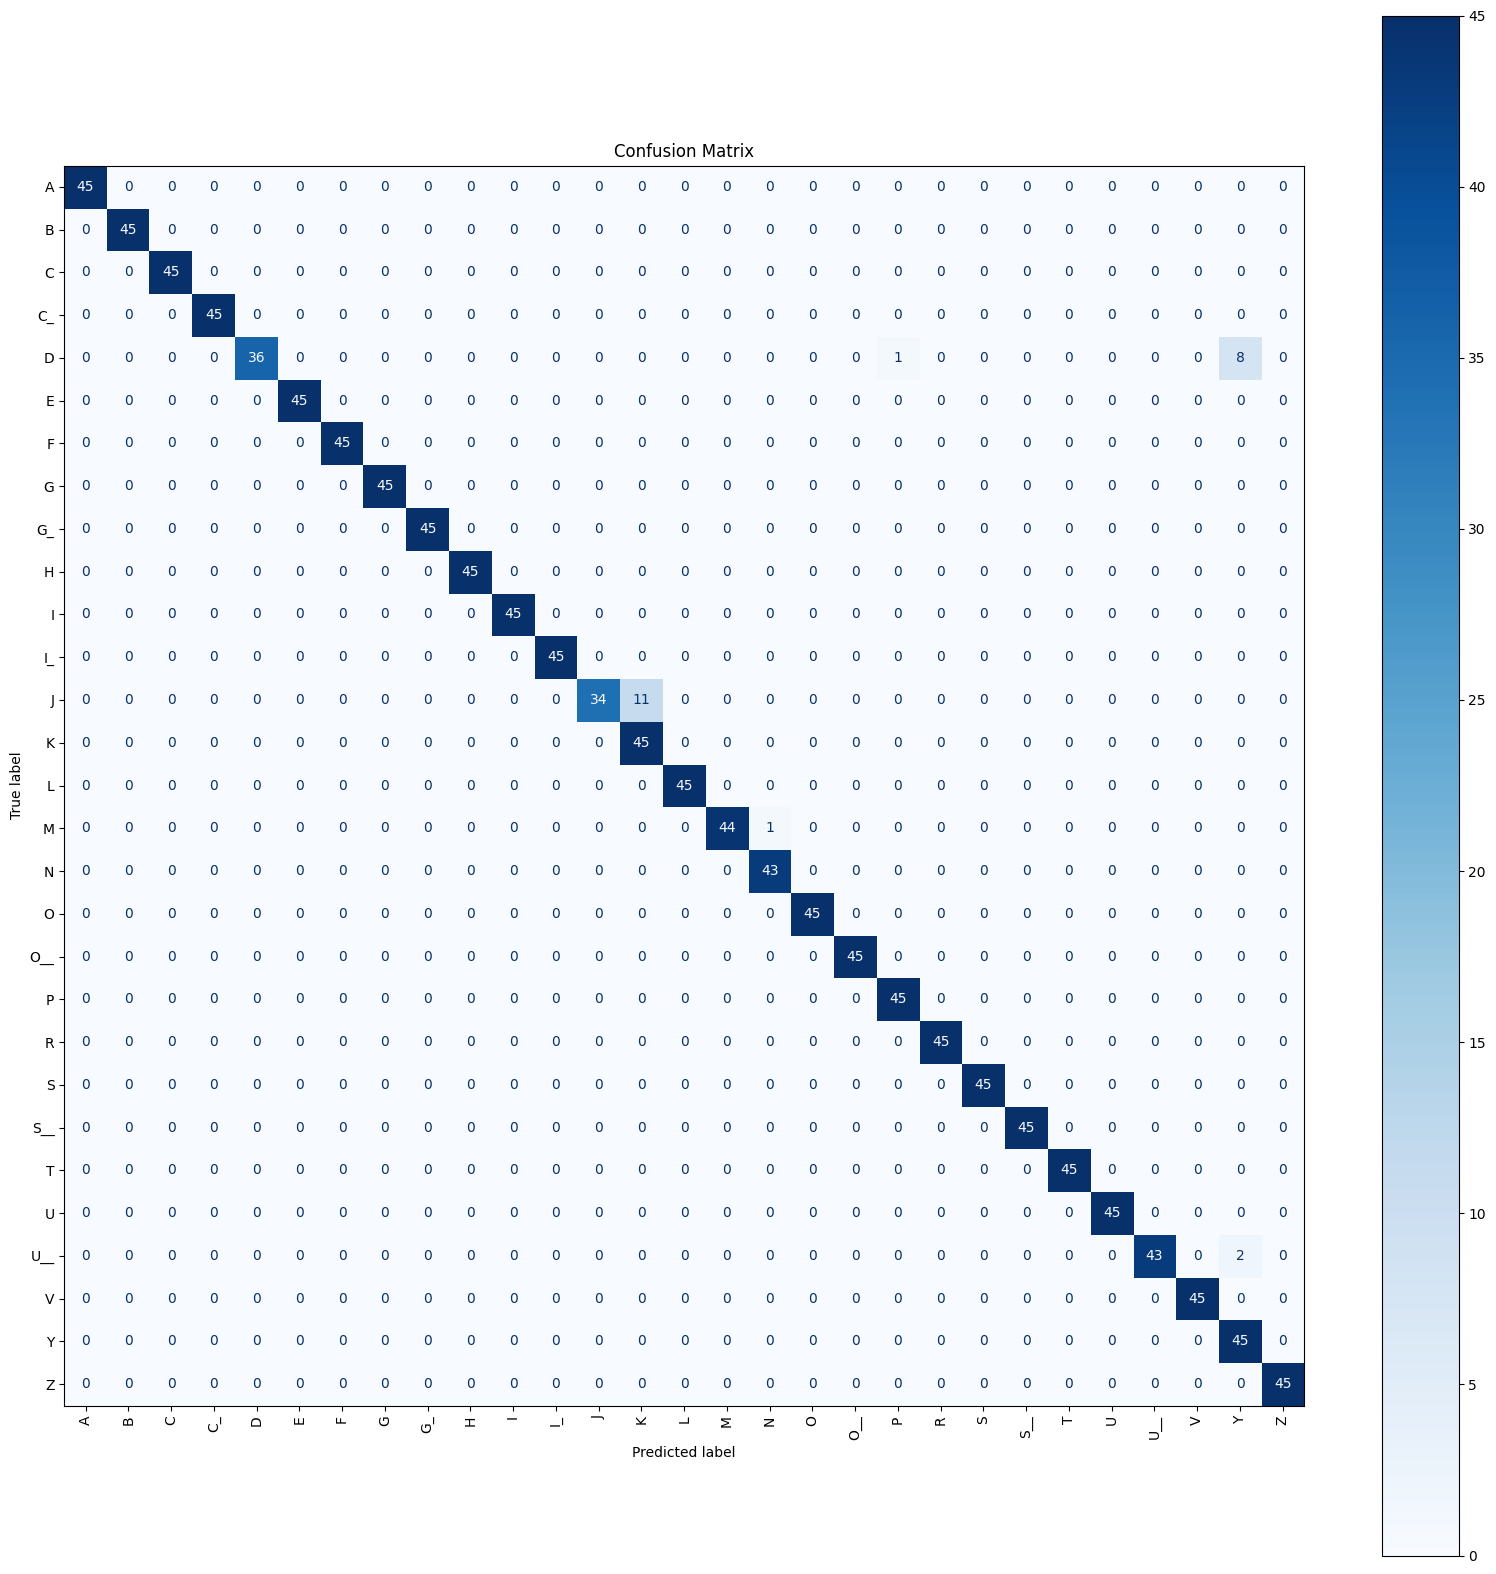

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation='vertical', ax=ax)

plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        45
           B       1.00      1.00      1.00        45
           C       1.00      1.00      1.00        45
          C_       1.00      1.00      1.00        45
           D       1.00      0.80      0.89        45
           E       1.00      1.00      1.00        45
           F       1.00      1.00      1.00        45
           G       1.00      1.00      1.00        45
          G_       1.00      1.00      1.00        45
           H       1.00      1.00      1.00        45
           I       1.00      1.00      1.00        45
          I_       1.00      1.00      1.00        45
           J       1.00      0.76      0.86        45
           K       0.80      1.00      0.89        45
           L       1.00      1.00      1.00        45
           M       1.00      0.98      0.99        45
           N       0.98      1.00      0.99        43
           O       1.00    